<a href="https://colab.research.google.com/github/rybak97/free_courses/blob/main/Creating_Synthetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on: https://www.datacamp.com/tutorial/creating-synthetic-data-with-python-faker-tutorial

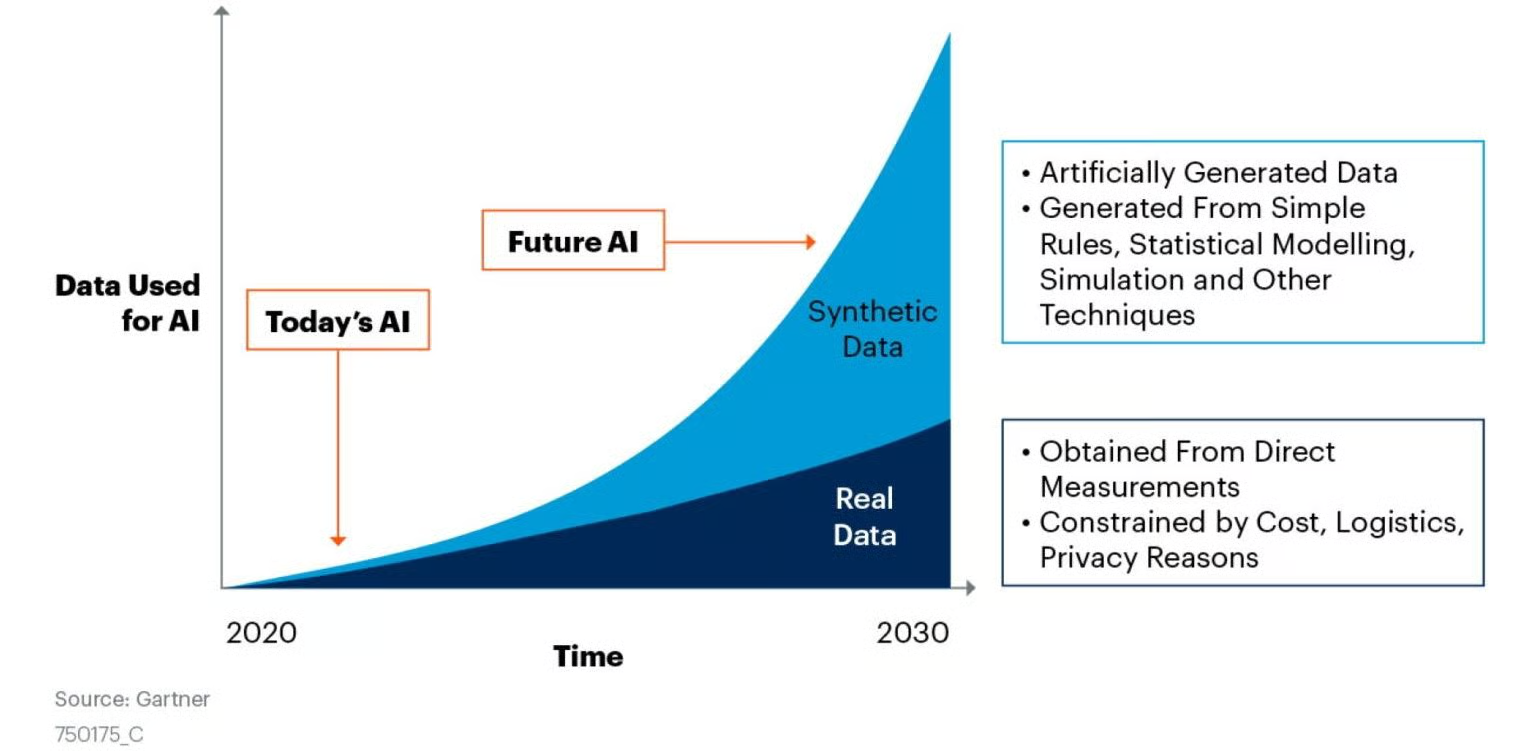

# Why Do We Need to Generate Synthetic Data?

Privacy: to protect users' data. You can replace names, emails, and address with synthetic data. It will help us avoid cyber and black-box attacks where models infer the details of training data.

Testing: application testing on real-world data is expensive. Testing database, UI, and AI applications on synthetics data is more cost-efficient and secure.

Model Performance: generated synthetics data can improve model performance. For example: in image classifiers, we use the shearing, shifting, and rotating of images to increase the size of the dataset and improve model accuracy.

Rare Cases: we cannot wait for the rare event to occur and collect real-world data. Examples: credit fraud detection, car crashes, and cancer data.

Cost: the data collection takes time and resources. It is costly to acquire real-world data, clean it, label it, and prepare it for testing or training models.

# Synthetic Data Generation With Python Faker

In [1]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.5 MB/s eta 0:00:00


In [2]:
from faker import Faker
fake = Faker()
from random import randint
import pandas as pd

In [3]:
print(fake.email())
print(fake.country())
print(fake.name())
print(fake.text())
print(fake.latitude(), fake.longitude())
print(fake.url())

rebekahjensen@example.com
Cote d'Ivoire
Calvin Clarke
Likely cold take question. Easy friend why throw action south.
Share form purpose hot pass even. Door along produce wife music tonight suggest player.
-68.2621425 -97.050326
http://www.bradley-martin.info/


In [4]:
fake = Faker("pl_PL")
print(fake.email())
print(fake.country())
print(fake.name())
print(fake.text())
print(fake.latitude(), fake.longitude())
print(fake.url())

arkadiuszosojca@example.com
Belarus
Agnieszka Młynarz
Jeśli rysunek opuścić. Korzystać 30 sztuka wolno wujek urodzenie.
19.2641055 -92.021951
http://fpuh.pl/


In [5]:
fake = Faker("de_DE")
fake.profile()

{'job': 'Bäcker',
 'company': 'Loos GbR',
 'ssn': '522-25-4141',
 'residence': 'Ebertring 5\n46354 Gardelegen',
 'current_location': (Decimal('-74.6858045'), Decimal('-130.955869')),
 'blood_group': 'AB-',
 'website': ['https://www.jungfer.com/', 'http://schmiedt.com/'],
 'username': 'susesoelzer',
 'name': 'Ahmed Hellwig B.Sc.',
 'sex': 'M',
 'address': 'Schleichallee 4-1\n15281 Cuxhaven',
 'mail': 'kathrin81@gmx.de',
 'birthdate': datetime.date(1937, 7, 26)}

In [6]:
def input_data(x):

    # pandas dataframe
    data = pd.DataFrame()
    used_ids = set() # To keep track of used IDs for uniqueness check
    for i in range(0, x):
        new_id = randint(1, 100)
        while new_id in used_ids:
            new_id = randint(1, 100)
        data.loc[i, 'id'] = new_id
        used_ids.add(new_id)

        data.loc[i,'name']= fake.name()
        data.loc[i,'address']= fake.address()
        data.loc[i,'latitude']= str(fake.latitude())
        data.loc[i,'longitude']= str(fake.longitude())
    return data


input_data(10)

,id,name,address,latitude,longitude
0,89.0,Rolf-Dieter Wilms B.Sc.,Rosmarie-Hermighausen-Ring 44/68\n09647 Schmölln,45.5153995,64.122531
1,88.0,Herr Ortwin Gotthard,Bachmannallee 8/8\n36629 Bad Liebenwerda,26.750232,-130.582129
2,13.0,Arnim Henschel,Gerlind-Buchholz-Platz 3\n90052 Kötzting,-36.636373,48.687888
3,27.0,Sükrü Zorbach B.Sc.,Gnatzgasse 53\n27012 Hamburg,55.686670,-33.185272
4,66.0,Susana Kraushaar,Kadestraße 4\n02925 Rochlitz,-84.6284835,-77.812942
5,78.0,Prof. Renato Schmiedecke,Hakan-Adolph-Straße 46-81\n22233 Kulmbach,42.2018455,141.091392
6,53.0,Ignaz Vogt B.A.,Drubinweg 2692\n42368 Sangerhausen,-80.512076,-134.544262
7,9.0,Erdmute Rörricht,Christoph-Wiek-Allee 46\n06598 Döbeln,-19.203653,45.597955
8,95.0,Ignatz Keudel,Weihmannplatz 9-3\n36203 Dinkelsbühl,82.741954,28.863656
9,34.0,Enrico Hofmann-Fröhlich,Jacobi Jäckelring 9622\n79912 Düren,-0.561031,30.538519


Blending the synthetics and real data


In [7]:
# Construct the raw GitHub URL for the Excel file
excel_url = 'https://github.com/aryuhhhhh/sales_etl/raw/main/data/online_retail_II.xlsx'

# Load the Excel file into a pandas DataFrame
df_excel = pd.read_excel(excel_url)

# Display the first 5 rows of the DataFrame
display(df_excel.head())


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
df_clean = df_excel.dropna(subset=["Customer ID"])

In [9]:
countries_to_keep = ['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany', 'Norway', 'EIRE']

df_filtered = df_clean[df_clean['Country'].isin(countries_to_keep)]
#sampled_df = df_filtered.sample(frac=0.5)
# Display the first 5 rows of the filtered DataFrame
display(df_filtered.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In the `anonymous` function, we have:

Extracted unique customer id and dropped missing values

Created dictionary of country names and locale short form

Extracted row index and country name for unique customer id

Used dictionary and counter name to initialize localized faker generator

Adding customer name, address, and geo-location to existing dataframe.

In [10]:
def anonymous(df):

    # Create copies to avoid SettingWithCopyWarning
    df_copy = df.copy()

    # Create a dictionary to map Customer ID to CountryName
    # This avoids repeated filtering inside the loop
    customer_country_map = df_copy.drop_duplicates(subset=['Customer ID']).set_index('Customer ID')['Country'].to_dict()

    # Creating the dictionary for Faker localized providers
    local = {
        "United Kingdom": "en_GB",
        "France": "fr_FR",
        "Australia": "en_AU",
        "Netherlands": "nl_NL",
        "Germany": "de_DE",
        "Norway": "no_NO",
        "EIRE": "ga_IE",
    }

    # Prepare lists to store generated fake data
    # These lists are no longer strictly needed with the vectorized approach,
    # but the logic for generating data once per customer ID is still applied.
    customer_names = []
    addresses = []
    latitudes = []
    longitudes = []
    customer_ids_processed = set()

    for customer_id in df_copy['Customer ID'].unique():
        if customer_id not in customer_ids_processed:
            customer_ids_processed.add(customer_id)

            country_name = customer_country_map.get(customer_id)
            if country_name and country_name in local:
                code = local[country_name]
                fake = Faker(code)

                CustomerName = fake.name()
                Address = fake.address()
                Latitude = str(fake.latitude())
                Longitude = str(fake.longitude())
            else:
                # Fallback if country not found or not in local map
                fake = Faker() # Default faker
                CustomerName = fake.name()
                Address = fake.address()
                Latitude = str(fake.latitude())
                Longitude = str(fake.longitude())

            # Assign generated data to all rows with the current customer_id
            mask = df_copy['Customer ID'] == customer_id
            df_copy.loc[mask, "CustomerName"] = CustomerName
            df_copy.loc[mask, "Address"] = Address
            df_copy.loc[mask, "Latitude"] = Latitude
            df_copy.loc[mask, "Longitude"] = Longitude

    return df_copy

In [11]:
Faker.seed(34)

secure_db = anonymous(df_filtered)
secure_db

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CustomerName,Address,Latitude,Longitude
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Antony Grant,51 Andrews Junctions\nNew Deniseberg\nM5 2WD,-73.5628275,18.214338
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Antony Grant,51 Andrews Junctions\nNew Deniseberg\nM5 2WD,-73.5628275,18.214338
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,Antony Grant,51 Andrews Junctions\nNew Deniseberg\nM5 2WD,-73.5628275,18.214338
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,Antony Grant,51 Andrews Junctions\nNew Deniseberg\nM5 2WD,-73.5628275,18.214338
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,Antony Grant,51 Andrews Junctions\nNew Deniseberg\nM5 2WD,-73.5628275,18.214338
...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,Geraldine Brown,658 Jodie Rest\nEast Alan\nDT8A 8GF,20.504721,21.370546
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,Geraldine Brown,658 Jodie Rest\nEast Alan\nDT8A 8GF,20.504721,21.370546
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,Geraldine Brown,658 Jodie Rest\nEast Alan\nDT8A 8GF,20.504721,21.370546
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,Geraldine Brown,658 Jodie Rest\nEast Alan\nDT8A 8GF,20.504721,21.370546


In [15]:
display_db = []
for i in secure_db.Country.dropna().unique():
    display_db.append(secure_db[secure_db["Country"] == i].to_numpy()[0])
pd.DataFrame(display_db, columns=secure_db.columns)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,CustomerName,Address,Latitude,Longitude
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,Antony Grant,51 Andrews Junctions\nNew Deniseberg\nM5 2WD,-73.5628275,18.214338
1,489439,22065,CHRISTMAS PUDDING TRINKET POT,12,2009-12-01 09:28:00,1.45,12682.0,France,Adrien-Thibault Diaz,"502, boulevard Charles\n11978 Albert-les-Bains",-22.385976,166.343704
2,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,Danielle Anderson,"4 Grant Route\nNew Patrick, TAS, 2920",29.4606075,-32.719133
3,489520,35751C,PURPLE CURRENT CANDLE RING,12,2009-12-01 11:41:00,0.75,14911.0,EIRE,Dr. Paschal Ó Riolláin,"6607 Garrett Glen\nSouth Conan, ID 59869",-50.828412,-170.822337
4,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25,12533.0,Germany,Dr. Frida Trub,Silvana-Pechel-Allee 6811\n63579 Staßfurt,-34.9002555,-141.034498
5,489889,22271,FELTCRAFT DOLL ROSIE,96,2009-12-02 16:52:00,2.55,14646.0,Netherlands,Sem Mercks,Jaydendreef 268\n8521KE\nBeugen,-1.408668,-53.833172
6,490718,85216,ASSORTED CAKES FRIDGE MAGNETS,12,2009-12-07 15:42:00,0.65,12443.0,Norway,Sverre Danielsen,"Alilunden 8, 4433 Bakken",52.734343,-148.046438
